# Exhaustive search

Some exhaustive search were explored in the [Mimicry and Wordle](https://github.com/patRyserWelch8/tutorials_jupyter/blob/main/Algorithm%2C%20structure%2C%20complexity/wordle.ipynb) notebook.  This notebook demonstrate how to reduce the comeplexity by simplifying some operations. 

We continue with this endeavour in this notebook. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time
from itertools import permutations 
import string
import math
%matplotlib inline

#set seed
random.seed(time.time() * 1000)


# Factors

[Factors](https://www.mathsisfun.com/numbers/factors-all-tool.html) are the integer  you multiply together to get another integer.  We use the integer value 15 to demonstrate how we could compute the factors. We rely on the [Modulo](https://www.mathsisfun.com/numbers/modulo.html) and [the set of natural numbers](https://www.mathsisfun.com/sets/number-types.html) to find our factors to identify whole numbers.

    factors is an array of length one containing 15
    For each number (n) in [2..14]
        find the remainder class of n
        if the remainder class is 0
            add the n in factors.
    


In [3]:
product = 15

print("product : " , product)


product :  15


In [4]:
factors = [product]
numbers = [*range(14,1,-1)]
print(numbers)

for number in numbers:
    if (product % number) == 0:
        factors.append(number)
        
factors

[14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2]


[15, 5, 3]

__function name :__ find_factors\
__inputs        :__ _product_, an integer value\
__precondition  :__ the product is  a part of the set of natural numbers\
__postcondition :__ returns an array of natural numbers, that all have a remainder class of 0 of the product

In [5]:
def find_factors(product:int) -> []:
    """compute the factors of a given product
    
    Preconditions: A product is a whole number part of the natural set of numbers
    Postcondition: Returns an array of natural numbers greater than 1. If the product is 
    prime, then the factors array contains only the product itself. Otherwise, the factors
    array has a length greater than 2.
    """
    factors = [product]
    numbers = range(product-1,1,-1)
    for number in numbers:
        if (product % number) == 0:
            factors.append(number)
    return factors

In [6]:
%time find_factors(7)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


[7]

In [7]:
%time find_factors(21)

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 9.54 µs


[21, 7, 3]

In [8]:
%time find_factors(36)

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 9.3 µs


[36, 18, 12, 9, 6, 4, 3, 2]

In [9]:
%time find_factors(1235)

CPU times: user 59 µs, sys: 11 µs, total: 70 µs
Wall time: 73 µs


[1235, 247, 95, 65, 19, 13, 5]

In [10]:
%time find_factors(98641362)

CPU times: user 5.74 s, sys: 5.73 ms, total: 5.75 s
Wall time: 5.75 s


[98641362,
 49320681,
 32880454,
 16440227,
 356106,
 178053,
 118702,
 59351,
 1662,
 831,
 554,
 277,
 6,
 3,
 2]

### Complexity 

Let's have consider each element of the algorithm. 

__factors = [product]__ 

It is constant -> $O(1)$

__numbers = range(product-1,1,-1)__

It may have a complexity of $O(n-2)$. We assume the implementation uses an iteration to generate the range of values. 

__for number in numbers:__ 

It is likely to be $O(n-2)$, the length of the range numbers without 1 and the product. 

__if (product % number) == 0:__

We apply the modolu operator $O(1)$, the comparison has also a constant complexity $O(1)$.

__factors.append(number):__

It is constant -> $O(1)$
    
So the worst complexity is $O(((n-2) * (3 * O(1)) + O(1))$ -> $O(3n+1)$. It is unlikely to occur has no natural numbers will have factors of all the numbers in the subset $ N \leq product$

The best complexity is for prime numbers, where $O(((n-2) * (2 * O(1)) + O(1))$ -> $O(2n+1)$. Prime numbers have no remainder class of 0.  So the complexity is $\theta(n)$


   

This exhaustive search may be simplified, but we could cut the running time by adding preventing half of the computations. Instead of using an array we use a set, to prevent factors being repeated unnecessarily.

__function name :__ find_factors\
__inputs        :__ _product_, an integer value\
__precondition  :__ the product is  a part of the set of natural numbers\
__postcondition :__ returns a set of natural numbers, that all have a remainder class of 0 of the product

In [11]:
def find_factors(product:int) -> {}:
    """compute the factors of a given product
    
    Preconditions: A product is a whole number part of the natural set of numbers
    Postcondition: Returns an array of natural numbers greater than 1. If the product is 
    prime, then the factors array contains only the product itself. Otherwise, the factors
    array has a length greater than 2.
    """
    factors = {product}
    numbers = range(product//2,1,-1)
    for number in numbers:
        if (product % number) == 0:
            factors.add(number)
            factors.add(product // number)
    return factors

In [12]:
%time find_factors(7)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.34 µs


{7}

In [13]:
%time find_factors(21)

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 11.7 µs


{3, 7, 21}

In [14]:
%time find_factors(36)

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 9.3 µs


{2, 3, 4, 6, 9, 12, 18, 36}

In [15]:
%time find_factors(1235)

CPU times: user 38 µs, sys: 0 ns, total: 38 µs
Wall time: 40.3 µs


{5, 13, 19, 65, 95, 247, 1235}

In [16]:
%time find_factors(98641362)

CPU times: user 2.91 s, sys: 3.82 ms, total: 2.92 s
Wall time: 2.91 s


{2,
 3,
 6,
 277,
 554,
 831,
 1662,
 59351,
 118702,
 178053,
 356106,
 16440227,
 32880454,
 49320681,
 98641362}

### Complexity 

Let's have consider each element of the algorithm. 

__factors = [product]__ 
It is constant -> $O(1)$

__numbers = range(product//2),1,-1)__int

It may have a complexity of $O((n/2)-1$. We assume the implementation uses an iteration to generate the range of values. 

__for number in numbers:__ 
It is likely to be $O(n/2)-1$, the length of the range numbers. 

__if (product % number) == 0:__

We apply the modolu operator $O(1)$, the comparison has also a constant complexity $O(1)$.

__factors.append(number):__
It is constant -> $O(1)$

__factors.add(product // number):__
It is constant -> $O(1)$
    
So the worst complexity is $O(((n/2) * (4 * O(1)) + O(1))$ -> $O(2n+1)$. 

The best complexity is for prime numbers, where $O((((n/2)) * (2* O(1)) + O(1))$ -> $O(n+1)$. Prime numbers have no remainder class of 0.  So the complexity is $\theta(n)$


   

## Comparison of both algorithms

Text(0.5, 1.0, 'Worse case complexity')

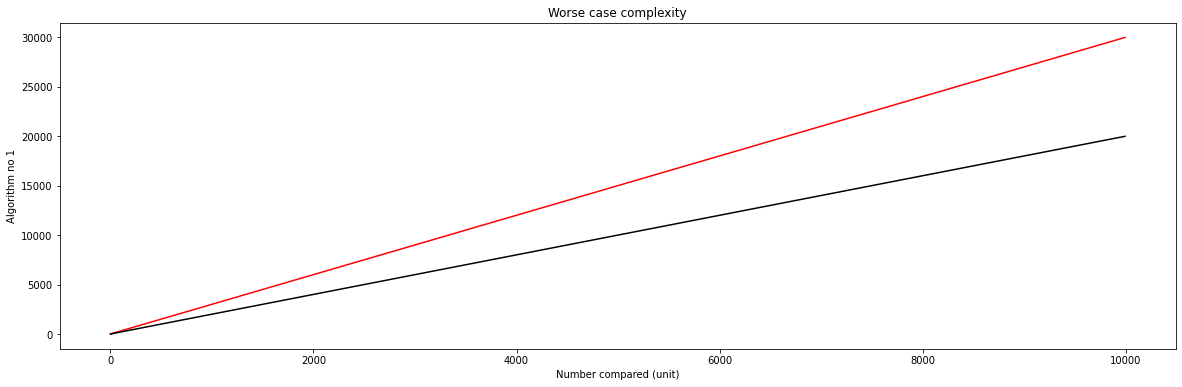

In [17]:
xs          = range(1,10001, 10) 
alg_no_1_ys = [3*x+1 for x in xs]
alg_no_2_ys = [2*x+1 for x in xs]
plt.figure(figsize=(20,6))
plt.plot(xs, alg_no_1_ys, color = "red", label="alg no 1" )
plt.plot(xs, alg_no_2_ys, color = "black", label="alg no 2" )
plt.xlabel("Number compared (unit)")
plt.ylabel("Algorithm no 1")
plt.title("Worse case complexity")


Text(0.5, 1.0, 'Best case complexity')

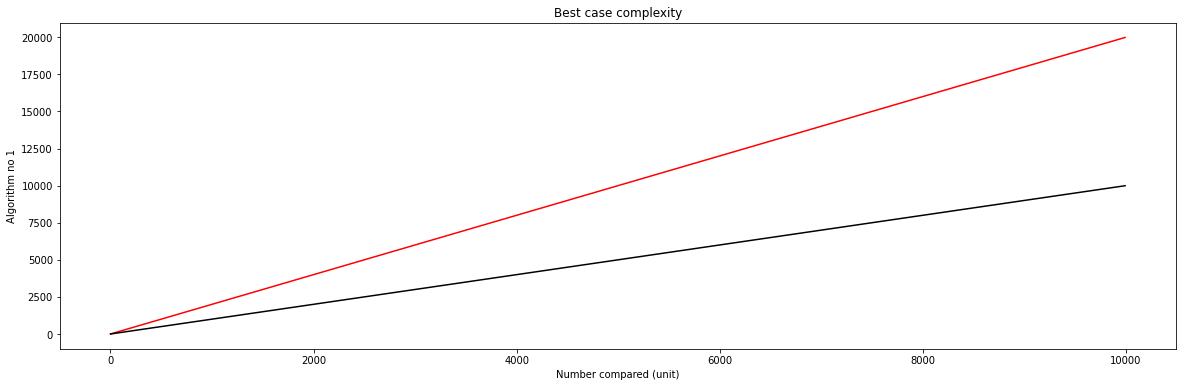

In [18]:
xs          = range(1,10001, 10) 
alg_no_1_ys = [2*x+1 for x in xs]
alg_no_2_ys = [x+1 for x in xs]
plt.figure(figsize=(20,6))
plt.plot(xs, alg_no_1_ys, color = "red", label="alg no 1")
plt.plot(xs, alg_no_2_ys, color = "black", label="alg no 2")
plt.xlabel("Number compared (unit)")
plt.ylabel("Algorithm no 1")
plt.title("Best case complexity")


# Traveling salesman Problem (TSP)

Some more information about the TSP can be found in [this thesis](https://etheses.whiterose.ac.uk/19011/) and [wikipedia](https://en.wikipedia.org/wiki/Travelling_salesman_problem). In this example we will simulate some _dummy_ and short instances. The [National TSP instances](https://www.math.uwaterloo.ca/tsp/world/countries.html) shows some long computations and illustrates why exhaustive search become infeasible rapidly.

## Problem definition

_Given a set of cities along with the cost of travel between each pair of them, traveling salesman problem, or TSP for short, is to find the cheapest way of visiting all the cities and returning the starting point._[1]

[1] David L Applegate, Robert E Bixby, Vasek Chvatal, and William J Cook. The traveling salesman problem: a computational study. Princeton university press, 2011.


## A simple example

This example uses five cities named A, B, C, D, E.  The distance between each city is in km, but randomly generated. So each time the cells are executed a new solution may exist. 

We compute the number of pair of cities. We use a complete graph to compute the number of vertices and therefore $\frac{n(n-1)}{2}$. An explanation can be found [here](https://mathworld.wolfram.com/CompleteGraph.html)



In [19]:
print("Cities:")
no_cities = 5
cities = set(string.ascii_uppercase[:no_cities])


Cities:


In [32]:
def build_dist_table_rand(no_cities:int)->[]:
    """
    Build a table of distances between each city. We consider each city a vertex in a digraph
    and the distances the edges.
    
    preconditions: no_cities is greater than 2.
    postconditions: returns a list of tuples. Each tuple represent a distinct permulation 
    of pairs of cities with a distance in km. The list is sorted alphabetically by vertices. 
    The number of explected rows is (no_cities * (no_cities-1))/2
    """
    assert(no_cities > 2)
    # initialise some values
    cities         = list(string.ascii_uppercase[:no_cities])
    pairs          = int((no_cities * (no_cities-1))/2)
    distances      = [random.randrange(10, 2000) for x in range(0,pairs, 1)]
    all_poss_pairs = list(permutations(cities,2))
    distinct_pairs = all_poss_pairs[0: no_cities-1]
    all_cities     = range(1,no_cities-1,1)
    dist_table     = []
   
    
    # reduce pairs to distinct pairs
    for city_no  in all_cities:
        first = city_no * (no_cities-1)
        last  = (city_no+1) * (no_cities) - (city_no + 1)
        pairs = all_poss_pairs[first:last]
        distinct_pairs = distinct_pairs + pairs[city_no: len(pairs)]
    
    # matches distances and pairs to build dist table
    indices = range(0, len(distances), 1)
    for index in indices:
        entry = (distinct_pairs[index][0], distinct_pairs[index][1], distances[index])
        dist_table.append(entry)
   
    return dist_table



In [21]:
all_distances = build_dist_table_rand(7)
all_distances

[('A', 'B', 1081),
 ('A', 'C', 821),
 ('A', 'D', 1545),
 ('A', 'E', 1899),
 ('A', 'F', 1833),
 ('A', 'G', 1947),
 ('B', 'C', 311),
 ('B', 'D', 1656),
 ('B', 'E', 109),
 ('B', 'F', 1092),
 ('B', 'G', 1406),
 ('C', 'D', 371),
 ('C', 'E', 35),
 ('C', 'F', 254),
 ('C', 'G', 907),
 ('D', 'E', 988),
 ('D', 'F', 245),
 ('D', 'G', 966),
 ('E', 'F', 193),
 ('E', 'G', 772),
 ('F', 'G', 1829)]

### Let's compute length of a tour



In [ ]:
def find_dist_between_cities(first_city:str, second_city:str, all_distances:[]) -> int:
    """
    search for the distance between two given cities. 
    preconditions: 
        - first and second city must be a non-empty string
        - all_distances must be not empty and contains tuples of 3 elements.
    postconditions: returns the distance between two cities. If the cities are not found, 
    then a zero length is returned.
    """
    assert(len(first_city) > 0)
    assert(len(second_city) > 0)
    assert(len(all_distances) > 0)
    assert(len(all_distances[0]) == 3)
    
    distance = 0
    
    if first_city < second_city:
        first  = first_city
        second = second_city
    else:
        first  = second_city
        second = first_city
        
    len_dist  = len(all_distances)
    index = 0 
    while index < len_dist:
        if (all_distances[index][0] == first) & (all_distances[index][1] == second):
            distance = all_distances[index][2]
            index = len_dist
        else :
            if index < (len_dist-1):
                index = index + 1
            else:
                index = len_dist
            
    return distance

print(find_dist_between_cities("A","B", all_distances))
print(find_dist_between_cities("E","D", all_distances))
print(find_dist_between_cities("D","D", all_distances))
        
        

In [ ]:
def total_length_tour(tour:[], all_distances:[]) -> int:
    """
    compute the total length of a given tour
    preconditions: 
        - tour is not empty
        - all_distances must be not empty and contains tuples of 3 elements.
    postconditions: returns the 
    """
    assert(len(tour) > 0)
    assert(len(all_distances) > 0)
    assert(len(all_distances[0]) == 3)
    
    tour_length = 0
    indices = range(0, len(tour), 1)
    for index in indices:

        if index == len(tour)-1:
            first  = tour[len(tour)-1]
            second = tour[0]
        else:
            first  = tour[index]
            second = tour[index+1]
        distance = find_dist_between_cities(first,second, all_distances)
        tour_length = tour_length + distance
        
    return tour_length

print(total_length_tour(["A", "B", "C", "D", "E"],all_distances))
print(total_length_tour(["E", "D", "C", "B", "A"],all_distances))
    

### Exhaustive search to find the shortest tour

In [42]:
def find_shortest_tour(cities:str, all_distances:[]) -> ():
    """
    compute the shortest tour for n cities.
    preconditions: a non-empty string of cities and a non-empty distance table.
    postconditions: return a tuple with made of a tour and its total length.  The shortest 
    tour is search exhaustively through all the possible permutations of cities; 
    that is a total of squared number of cities in total. 
    """
    
    assert(len(cities) > 0)
    assert(len(all_distances) > 0)
    
    # All permutations
    tours = list(permutations(cities,len(cities)))
    best_tour = (tours[0],total_length_tour(tours[0],all_distances))
    most_tours = tours[1:len(tours)-1]
    
    for tour in most_tours:
        current_tour = (tour ,total_length_tour(tour ,all_distances))
        if (current_tour[1] < best_tour[1]):
            best_tour = current_tour
    
    return best_tour    

In [35]:
print("The minimum tour length is : ")
%time find_shortest_tour(cities, all_distances)

The minimum tour length is : 
CPU times: user 2min 44s, sys: 240 ms, total: 2min 45s
Wall time: 2min 45s


(('C', 'G', 'J', 'D', 'A', 'H', 'B', 'F', 'I', 'E'), 3341)

## Let's explore other instances with more cities

We explore the running time and the theta complexity. 

## Three cities

In [36]:
no_cities = 3
cities    = set(string.ascii_uppercase[:no_cities])
print("maximum of number of tours : ", math.pow(no_cities,2))
print(cities)

maximum of number of tours :  9.0
{'C', 'A', 'B'}


In [37]:
all_distances = build_dist_table_rand(no_cities)
all_distances

[('A', 'B', 602), ('A', 'C', 315), ('B', 'C', 1730)]

In [38]:
print("The minimum tour length is : ")
%time find_shortest_tour(cities, all_distances)

The minimum tour length is : 
CPU times: user 48 µs, sys: 0 ns, total: 48 µs
Wall time: 52 µs


(('C', 'A', 'B'), 2647)

## 7 cities

In [39]:


no_cities = 7
cities    = set(string.ascii_uppercase[:no_cities])
print("maximum of number of tours : ", math.pow(no_cities,2))
print(cities)

all_distances = build_dist_table_rand(no_cities)
all_distances

print("The minimum tour length is : ")
%time find_shortest_tour(cities, all_distances)## Three cities

maximum of number of tours :  49.0
{'C', 'A', 'B', 'G', 'F', 'D', 'E'}
The minimum tour length is : 
CPU times: user 84.6 ms, sys: 3.99 ms, total: 88.6 ms
Wall time: 87.8 ms


(('C', 'G', 'A', 'B', 'D', 'F', 'E'), 5038)

## 10 cities 

In [40]:
no_cities = 10
cities    = set(string.ascii_uppercase[:no_cities])
print("maximum of number of tours : ", math.pow(no_cities,2))
print(cities)

all_distances = build_dist_table_rand(no_cities)
all_distances

print("The minimum tour length is : ")
%time find_shortest_tour(cities, all_distances)

maximum of number of tours :  100.0
{'C', 'H', 'I', 'A', 'B', 'G', 'F', 'D', 'J', 'E'}
The minimum tour length is : 
CPU times: user 2min 43s, sys: 192 ms, total: 2min 43s
Wall time: 2min 43s


(('C', 'B', 'G', 'J', 'D', 'F', 'A', 'H', 'I', 'E'), 3930)

## Complexity


[Complexity of exhaustive search and TSP](https://crab.rutgers.edu/users/guyk/es.pdf)

The exhaustive search itself remains $\theta(n)$. However, generating all the possible permutations of tours is $\theta(n!)$ [see explanations](https://leadcoding.in/find-all-the-permutations-of-an-array/). Therefore, the exponential complexity is higher than the linear complexity. So we assume the complexity is a factorial. 

Looking at the execution time - which are different from the time complexity - 10 cities tooks minutes rather milliseconds. It demonstrates how quickly exhaustive search can become obsolete and infeasible to use. 

Text(0.5, 1.0, 'Time complexity')

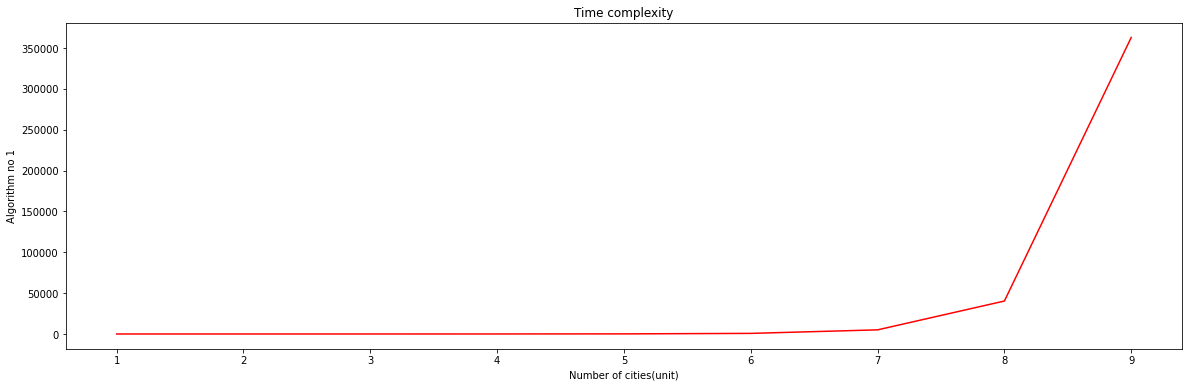

In [46]:
xs = range(1,10, 1) 
ys = [math.factorial(x) for x in xs]
plt.figure(figsize=(20,6))
plt.plot(xs, ys, color = "red",  )
plt.xlabel("Number of cities(unit)")
plt.ylabel("Algorithm no 1")
plt.title("Time complexity")


In [51]:
math.factorial(3)

6

In [52]:
math.factorial(5)

120

In [53]:
math.factorial(7)

5040

In [54]:
math.factorial(10)

3628800